In [1]:
#!pip install wikipedia

In [2]:
import pandas as pd 
import wikipedia

articles = ['Shopping', 'Consumer', 'Marketing', 'Finance', 'Technology']

title = []
wiki_list = []

for i in articles:
    print("Downloading Wiki Content for: ", i)
    wiki_list.append(wikipedia.page(i).content)
    title.append(i)

wiki_list

['Shopping is an activity in which a customer browses the available goods or services presented by one or more retailers with the potential intent to purchase a suitable selection of them. A typology of shopper types has been developed by scholars which identifies one group of shoppers as recreational shoppers, that is, those who enjoy shopping and view it as a  leisure activity.Online shopping has become a major disruptor in the retail industry as consumers can now search for product information and place product orders across different regions. Online retailers deliver their products directly to the consumers\' home, offices or wherever they want. The B2C (business to consumer) process has made it easy for consumers to select any product online from a retailer\'s website and to have it delivered relatively quickly. Using online shopping methods, consumers do not need to consume energy by physically visiting physical stores. This way they save time and the cost of travelling. A retail

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer(stop_words='english')
X = Vectorizer.fit_transform(wiki_list)

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 250, n_init = 10)
model.fit(X)

KMeans(max_iter=250, n_clusters=5)

In [7]:
labels = model.labels_
labels

array([2, 4, 0, 3, 1])

In [9]:
res = pd.DataFrame(list(zip(title, labels)), columns = ['title', 'clusterNumber'])
res

,title,clusterNumber
0,Shopping,2
1,Consumer,4
2,Marketing,0
3,Finance,3
4,Technology,1


cluster : 0
Titles
 Marketing


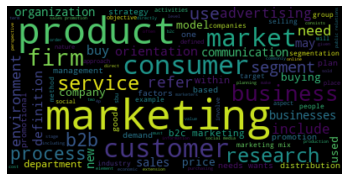

cluster : 1
Titles
 Technology


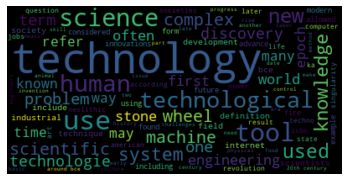

cluster : 2
Titles
 Shopping


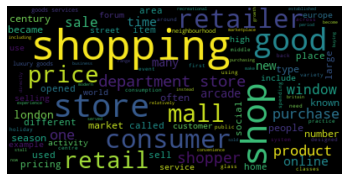

cluster : 3
Titles
 Finance


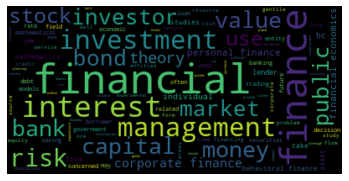

cluster : 4
Titles
 Consumer


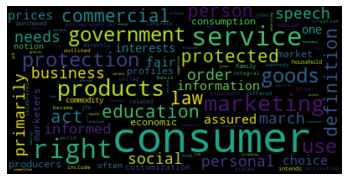

In [21]:
#importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#creating a dataframe of articles with cluster_labels
result = {'cluster': labels, 'wiki': wiki_list}
result = pd.DataFrame(result)

#running the loop based on the number of clusters
for k in range(0, 5):
    
    #text manipulation and conversion
    s = result[result.cluster == k]            #selecting the article based on cluster number(loop)
    text = s['wiki'].str.cat(sep = ' ')        #concatenating text with space separator
    text = text.lower()                        #converting text to lower case
    text = ' '.join([word for word in text.split()]) #splitting & joining the text based on the spaces
    
    wordcloud = WordCloud(max_font_size = 50, max_words = 100).generate(text)  #wordcloud object
    print('cluster : {}'.format(k))            #printing cluster number (loop variable)
    print('Titles')                            #simple printing of Titles string

    titles = res[res.clusterNumber == k]['title']    #taking the title value from cluster profile

    print(titles.to_string(index = False))     #printing the title string 
    
    #wordcloud printing
    plt.figure()
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()